In [19]:
# Import useful libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:20,.2f}'.format

## Import Clean Dataset

In [20]:
data = pd.read_csv("Student Alcohol Consumption_clean.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,nursery,internet,MG1,MG2,MG3,PG1,PG2,PG3,_merge,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,alc,Pedu
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,yes,no,5.00,6.00,6.00,0.00,11.00,11.00,both,mother,2.00,2.00,0.00,yes,no,no,no,yes,no,4.00,3.00,4.00,1.00,1.00,3.00,6.00,2.00,8
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,no,yes,5.00,5.00,6.00,9.00,11.00,11.00,both,father,1.00,2.00,0.00,no,yes,no,no,yes,no,5.00,3.00,3.00,1.00,1.00,3.00,4.00,2.00,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,yes,yes,7.00,8.00,10.00,12.00,13.00,12.00,both,mother,1.00,2.00,3.00,yes,no,yes,no,yes,no,4.00,3.00,2.00,2.00,3.00,3.00,10.00,5.00,2
3,GP,F,15,U,GT3,T,4,2,health,services,home,yes,yes,15.00,14.00,15.00,14.00,14.00,14.00,both,mother,1.00,3.00,0.00,no,yes,yes,yes,yes,yes,3.00,2.00,2.00,1.00,1.00,5.00,2.00,2.00,6
4,GP,F,16,U,GT3,T,3,3,other,other,home,yes,no,6.00,10.00,10.00,11.00,13.00,13.00,both,father,1.00,2.00,0.00,no,yes,yes,no,yes,no,4.00,3.00,2.00,1.00,2.00,5.00,4.00,3.00,6


## EDA

### Basic Demgraphics

Text(0.5, 1.0, 'Gender of students : F - Female, M - Male')

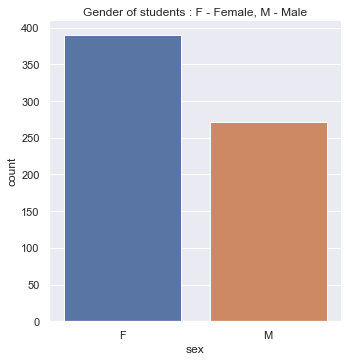

In [21]:
sb.catplot(x="sex", kind="count", data=data)
plt.title("Gender of students : F - Female, M - Male")

Text(0.5, 1.0, 'Age of students')

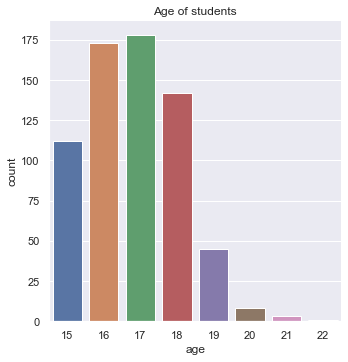

In [22]:
sb.catplot(x="age", kind="count", data=data)
plt.title("Age of students")

### Uni-variate Analysis

First, we perform uni-variate analysis on the attributes we are most interested in: 'age', 'Pedu', 'MG3', 'PG3', 'studytime', 'famrel'.

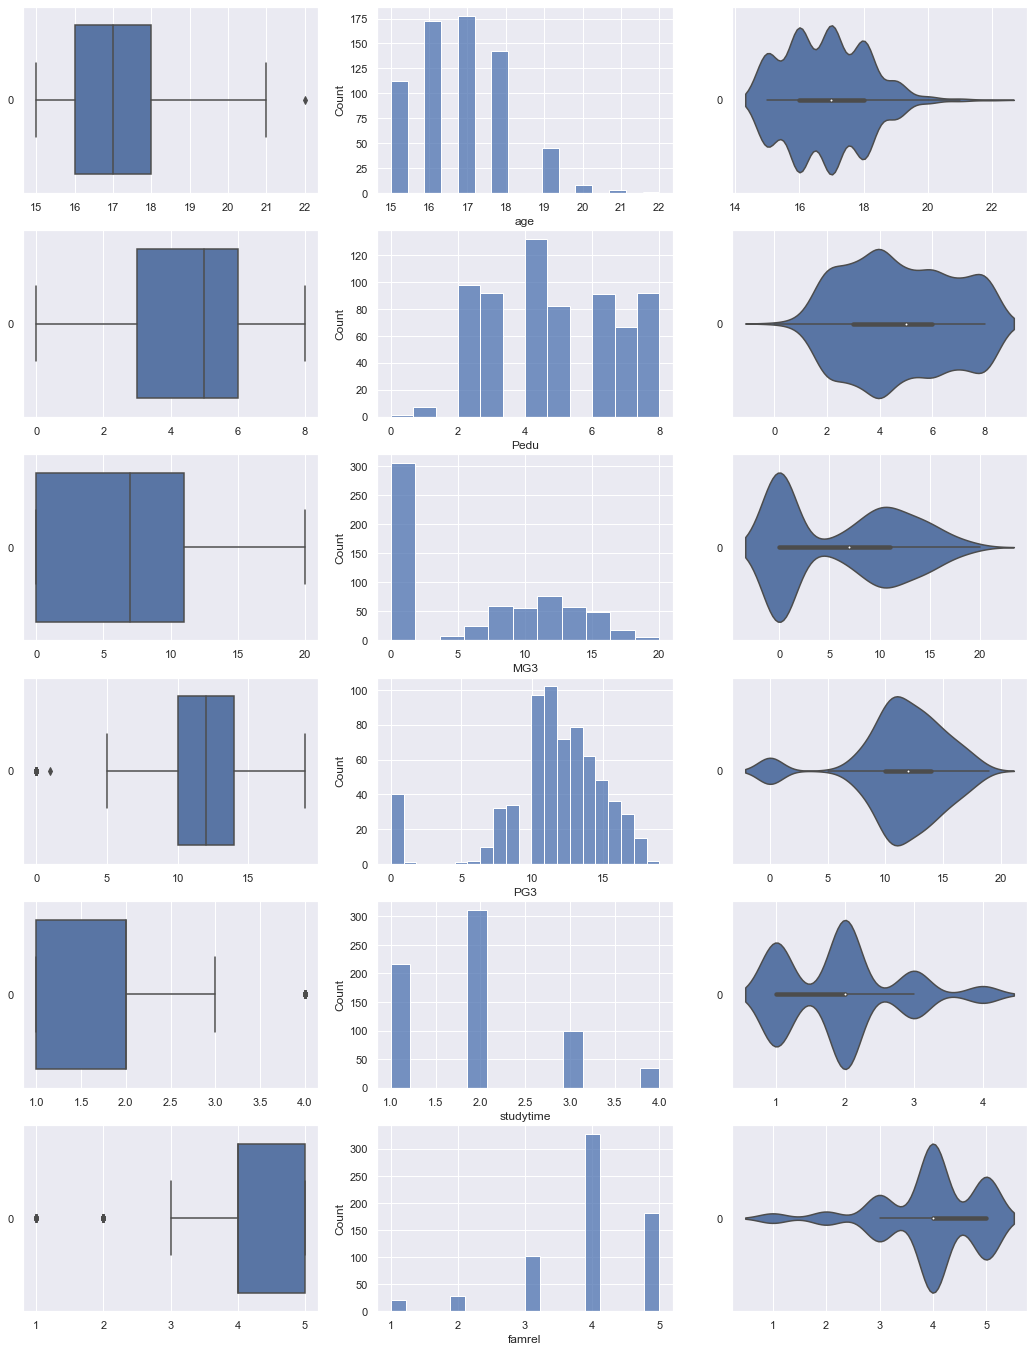

In [23]:
numericval = pd.DataFrame(data[['age', 'Pedu', 'MG3', 'PG3', 'studytime', 'famrel']])
numericval.fillna(0, inplace = True)

f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in numericval:
    sb.boxplot(data = numericval[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numericval[var], ax = axes[count,1])
    sb.violinplot(data = numericval[var], orient = "h", ax = axes[count,2])
    count += 1

Text(0.5, 0, 'Total weekly alcohol consumption')

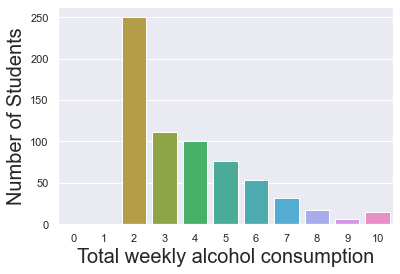

In [27]:
lst = []
for i in range(11):
    lst.append(len(data[data.alc == i]))
ax = sb.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = lst)
plt.ylabel('Number of Students', fontsize = 20)
plt.xlabel('Total weekly alcohol consumption', fontsize = 20)

All students' weekly alcohol consumption is at least 2, which corresponds to 1 (low) in Dalc and 1 (low) in Walc. Since the biggest number of students consume low amount of alcohol throughout the week, most students do not drink much.

### Multi-variate Analysis

First, we plot a correlation matrix heatmap to identify significant correlations between variables.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'Medu'),
  Text(0, 2.5, 'Fedu'),
  Text(0, 3.5, 'MG1'),
  Text(0, 4.5, 'MG2'),
  Text(0, 5.5, 'MG3'),
  Text(0, 6.5, 'PG1'),
  Text(0, 7.5, 'PG2'),
  Text(0, 8.5, 'PG3'),
  Text(0, 9.5, 'traveltime'),
  Text(0, 10.5, 'studytime'),
  Text(0, 11.5, 'failures'),
  Text(0, 12.5, 'famrel'),
  Text(0, 13.5, 'freetime'),
  Text(0, 14.5, 'goout'),
  Text(0, 15.5, 'Dalc'),
  Text(0, 16.5, 'Walc'),
  Text(0, 17.5, 'health'),
  Text(0, 18.5, 'absences'),
  Text(0, 19.5, 'alc'),
  Text(0, 20.5, 'Pedu')])

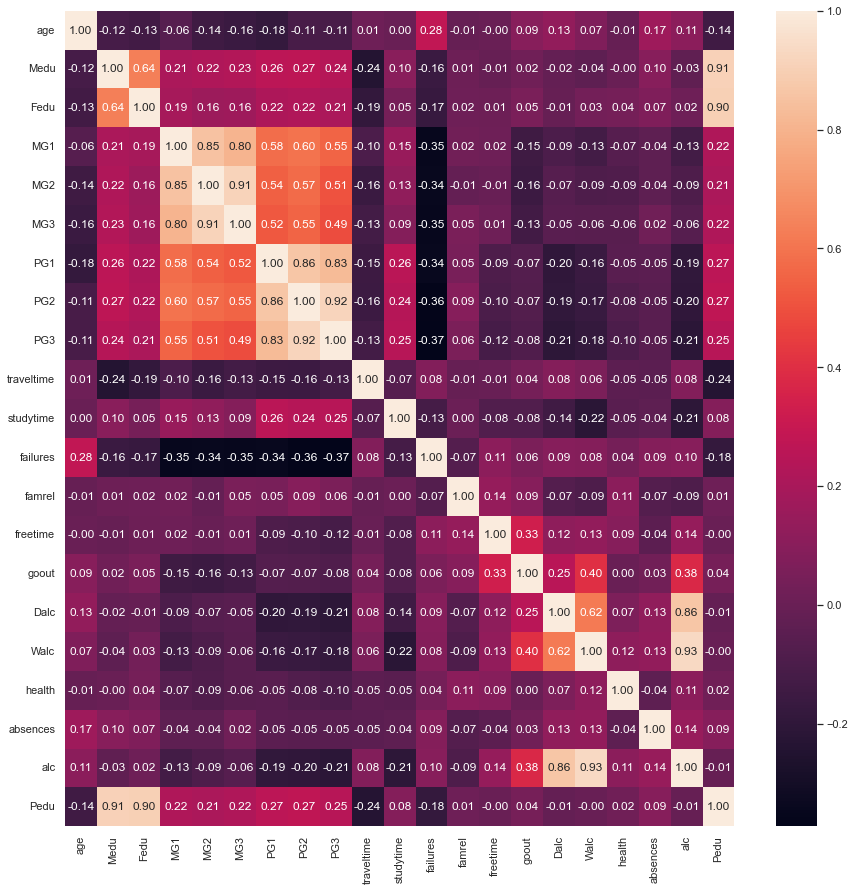

In [30]:
plt.figure(figsize=(15,15))
sb.heatmap(data.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

From the correlation matrix, we see that <b>studytime and Pedu</b> have <b>weak positive correlation</b> to grades. On the other hand, <b>traveltime and failures</b> have <b>weak negative correlation</b> to grades.

---

Next, we look at pairplots between variables.

In [29]:
numericalColumns = data[['age', 'Medu', 'Fedu', 'MG1', 'MG2', 'MG3', 'PG1', 'PG2', 'PG3', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'alc', 'Pedu']]

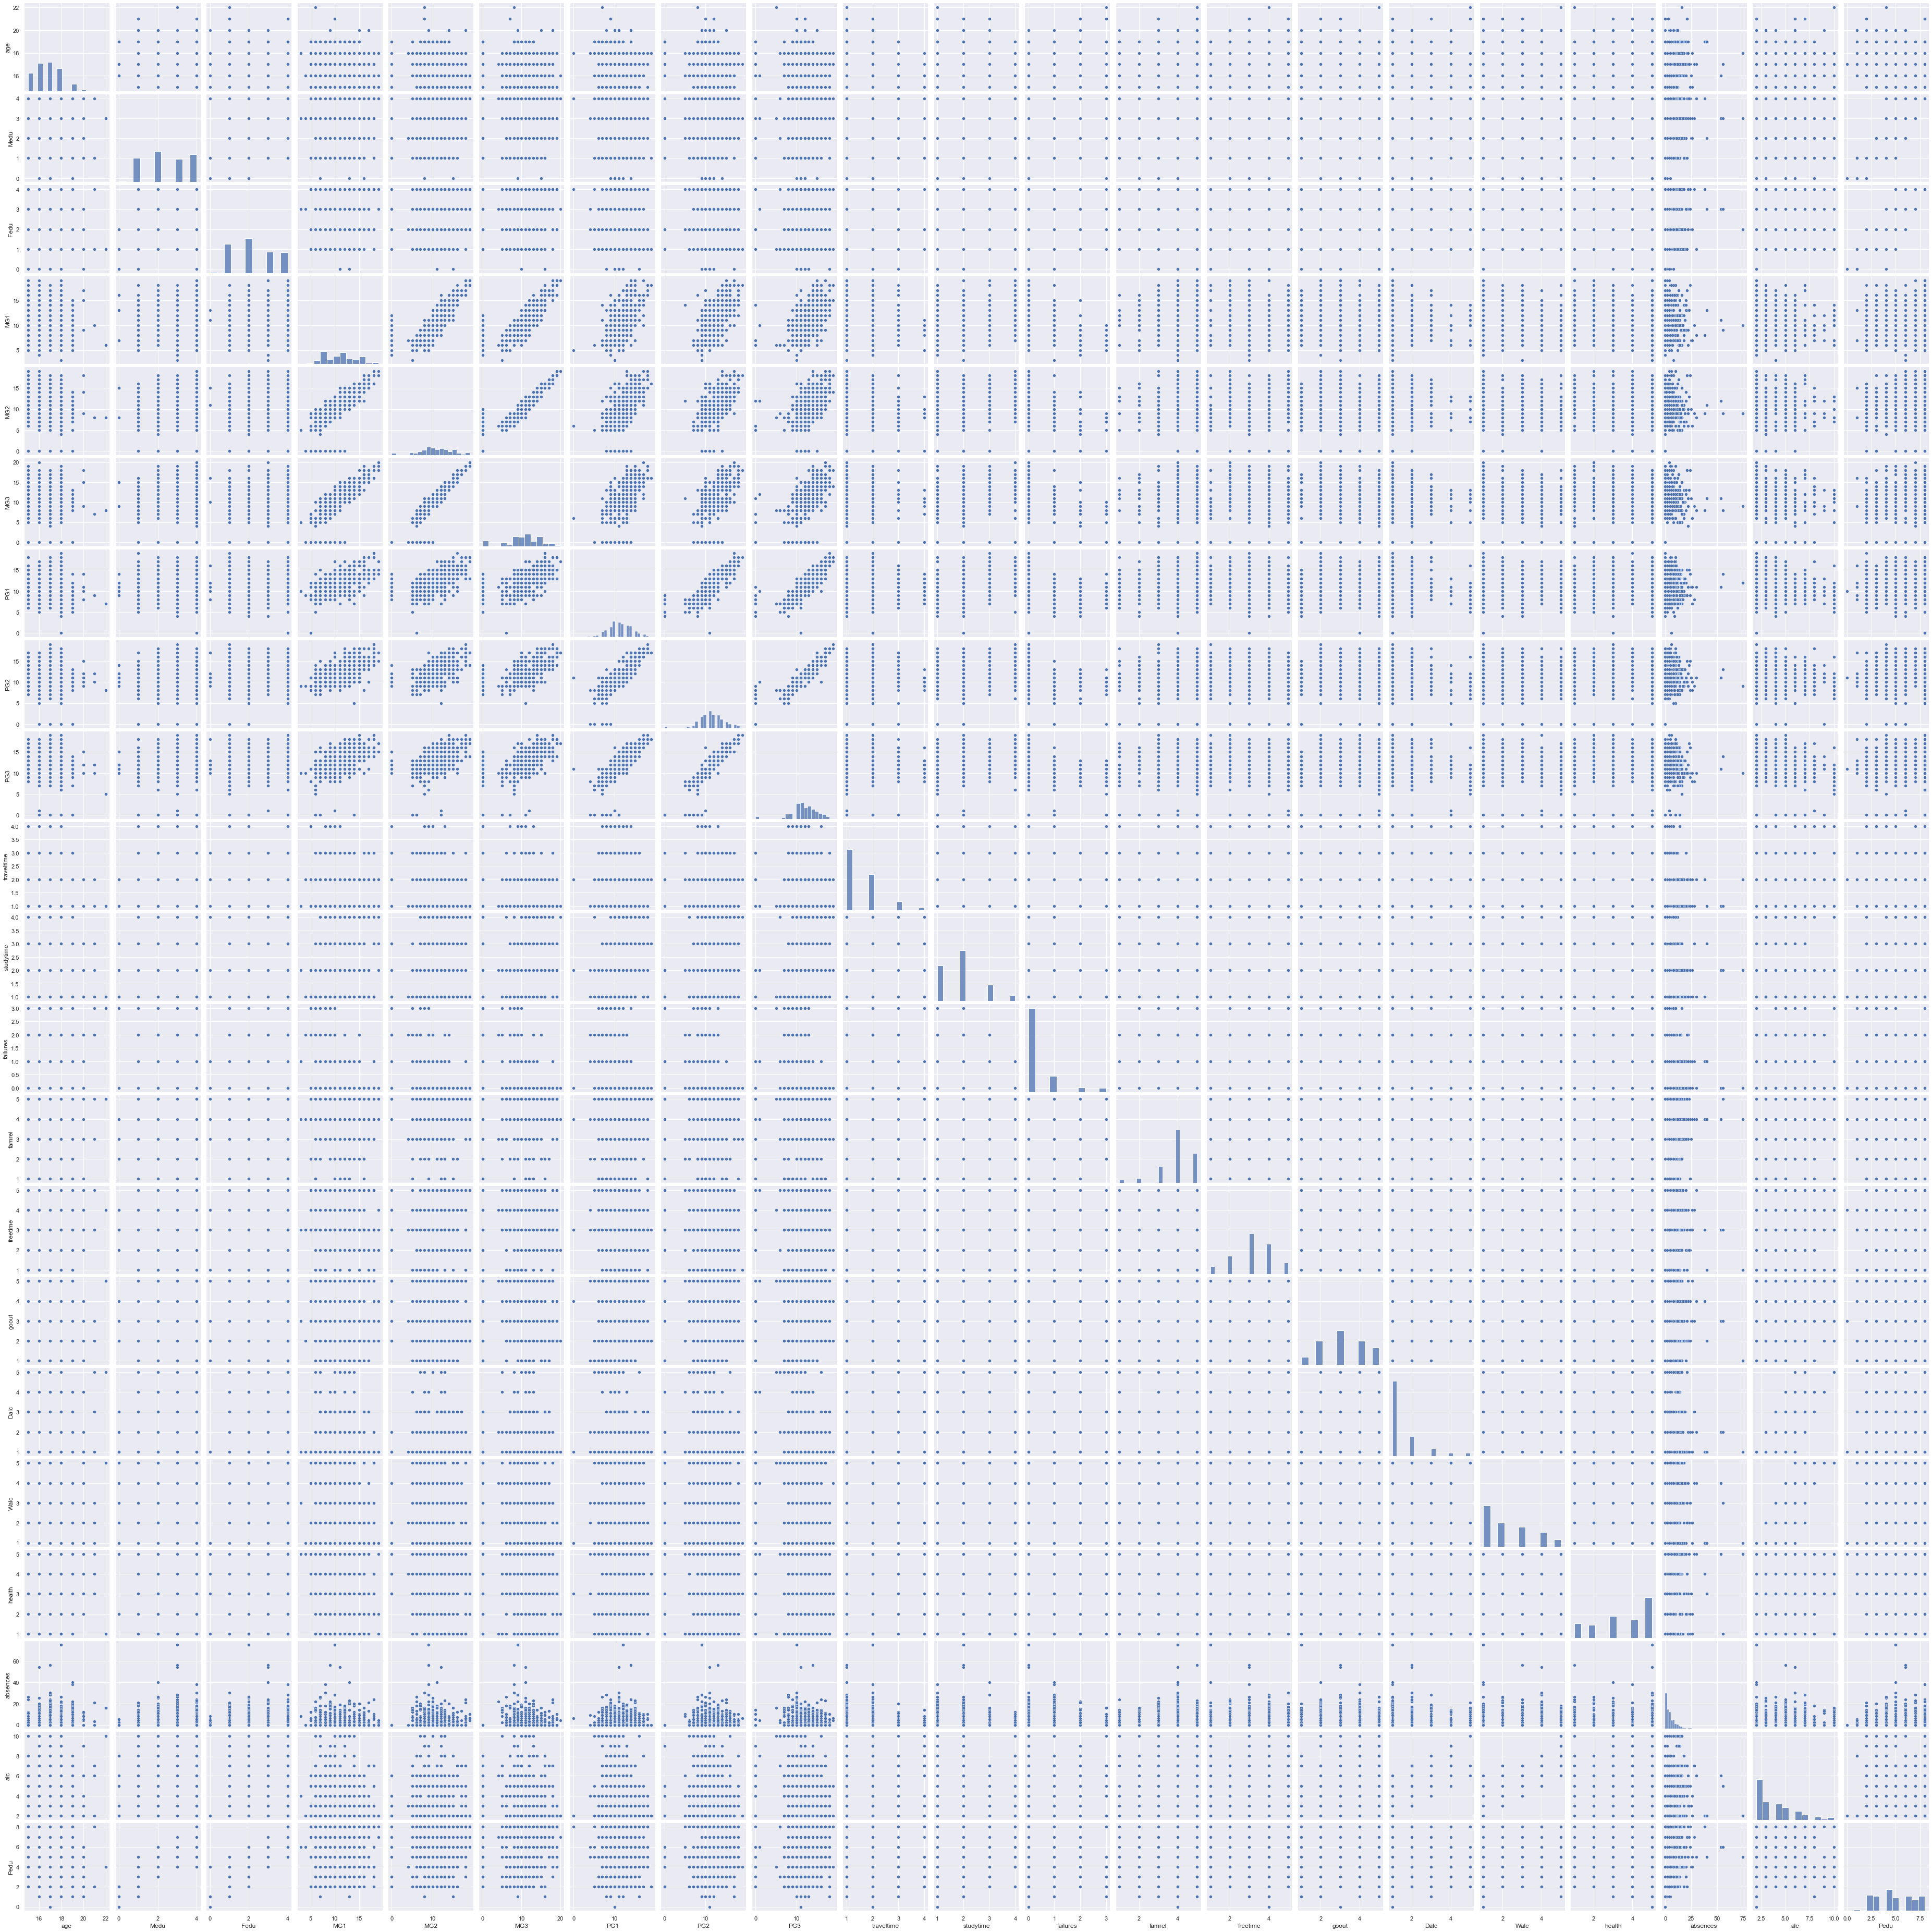

In [33]:
sb.pairplot(data = numericalColumns)

Next, we look at pairplots between Math grades and Portuguese grades agaisnt other variables.

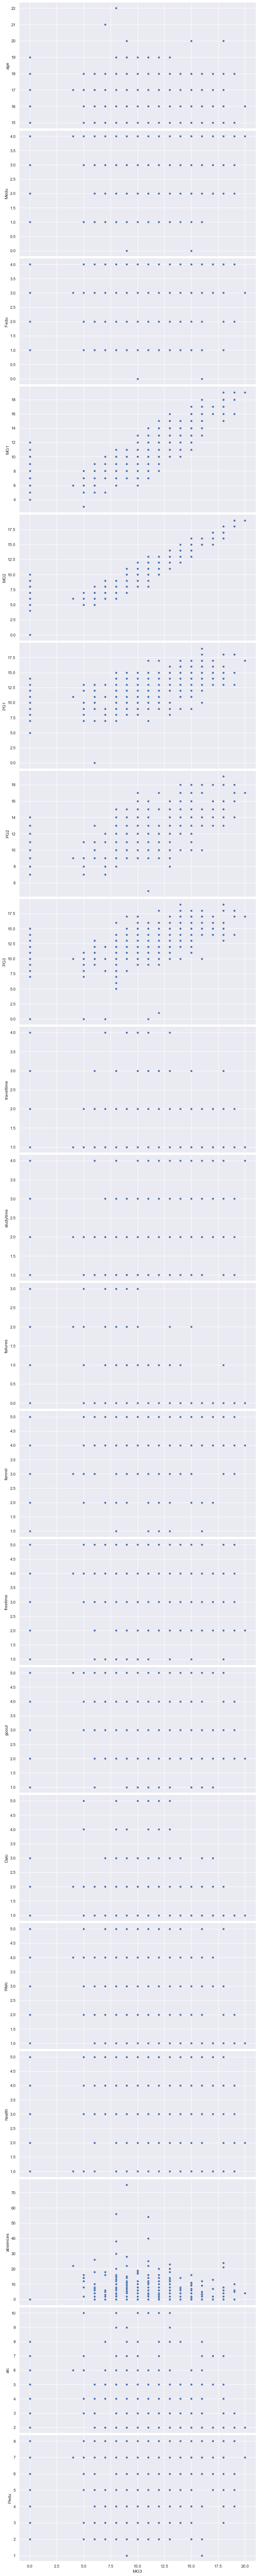

In [32]:
sb.pairplot(data=numericalColumns,
            x_vars=['MG3'],
            y_vars=['age', 'Medu', 'Fedu', 'MG1', 'MG2', 'PG1', 'PG2', 'PG3', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'alc', 'Pedu'],
            height=5, 
            aspect=2)

In [35]:
print(f"Average = {data['MG3'].mean()}, Median = {data['MG3'].median()}")

Average = 10.491048593350383, Median = 11.0


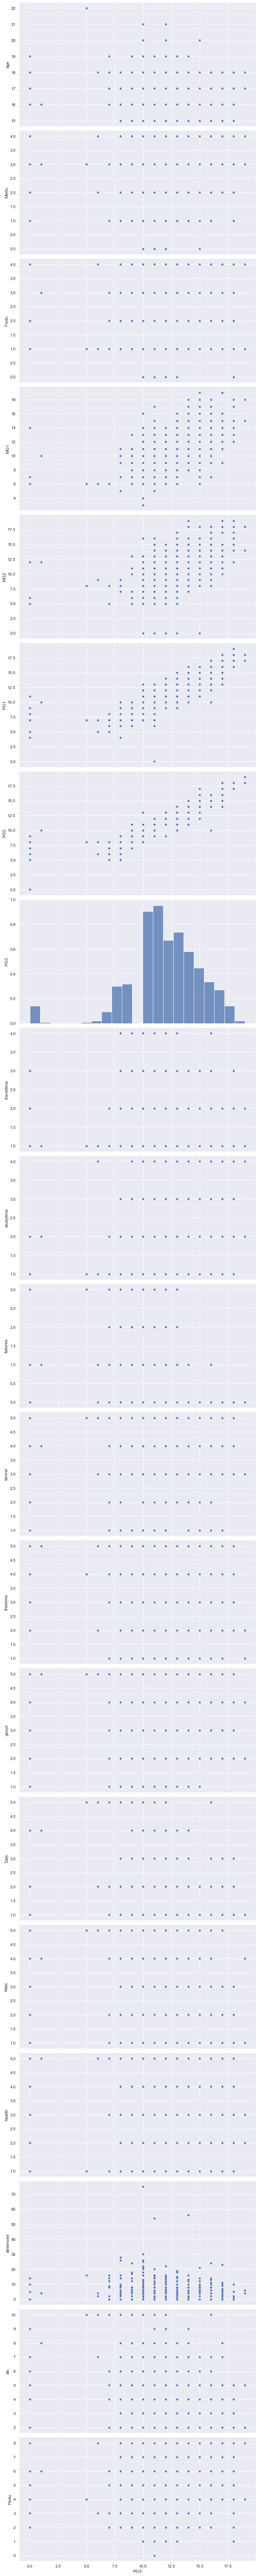

In [34]:
sb.pairplot(data=numericalColumns,
            x_vars=['PG3'],
            y_vars=['age', 'Medu', 'Fedu', 'MG1', 'MG2', 'PG1', 'PG2', 'PG3', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'alc', 'Pedu'],
            height=5, 
            aspect=2) 

In [36]:
print(f"Portuguese Average = {data['PG3'].mean()}, Portuguese Median = {data['PG3'].median()}")

Portuguese Average = 11.92778649921507, Portuguese Median = 12.0


### Explore Alcohol Consumption vs Grades Among Students

Text(0.5, 0, 'Weekly alcohol consumption')

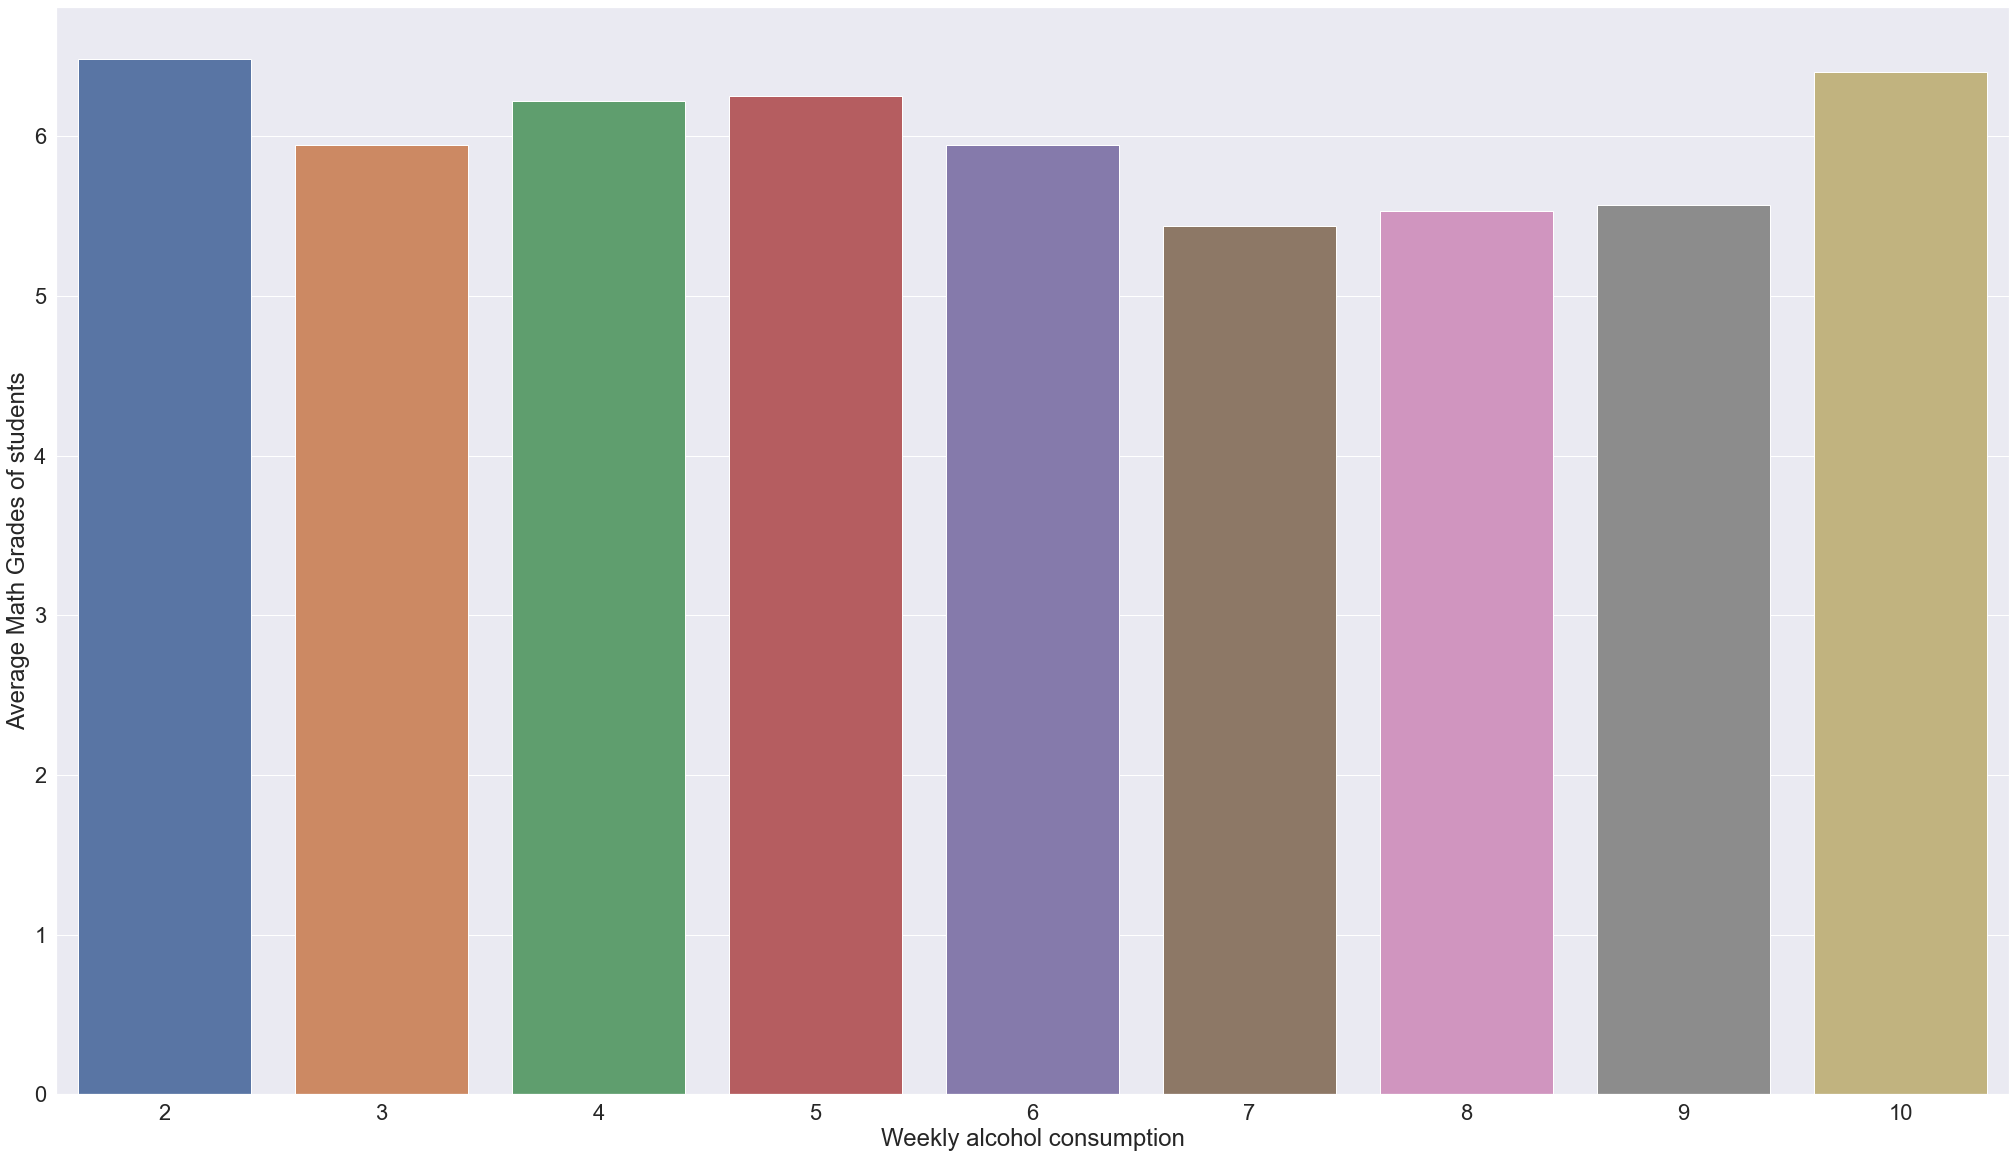

In [49]:
# Average Math grade vs alc
lst = []
for i in range(2,11):
    lst.append(data[data.alc == i]['MG3'].sum()/float(len(data[data.alc == i])))
ax = sb.barplot(x = [2,3,4,5,6,7,8,9,10], y = lst)
plt.ylabel('Average Math Grades of students')
plt.xlabel('Weekly alcohol consumption')

Text(0.5, 0, 'Weekly alcohol consumption')

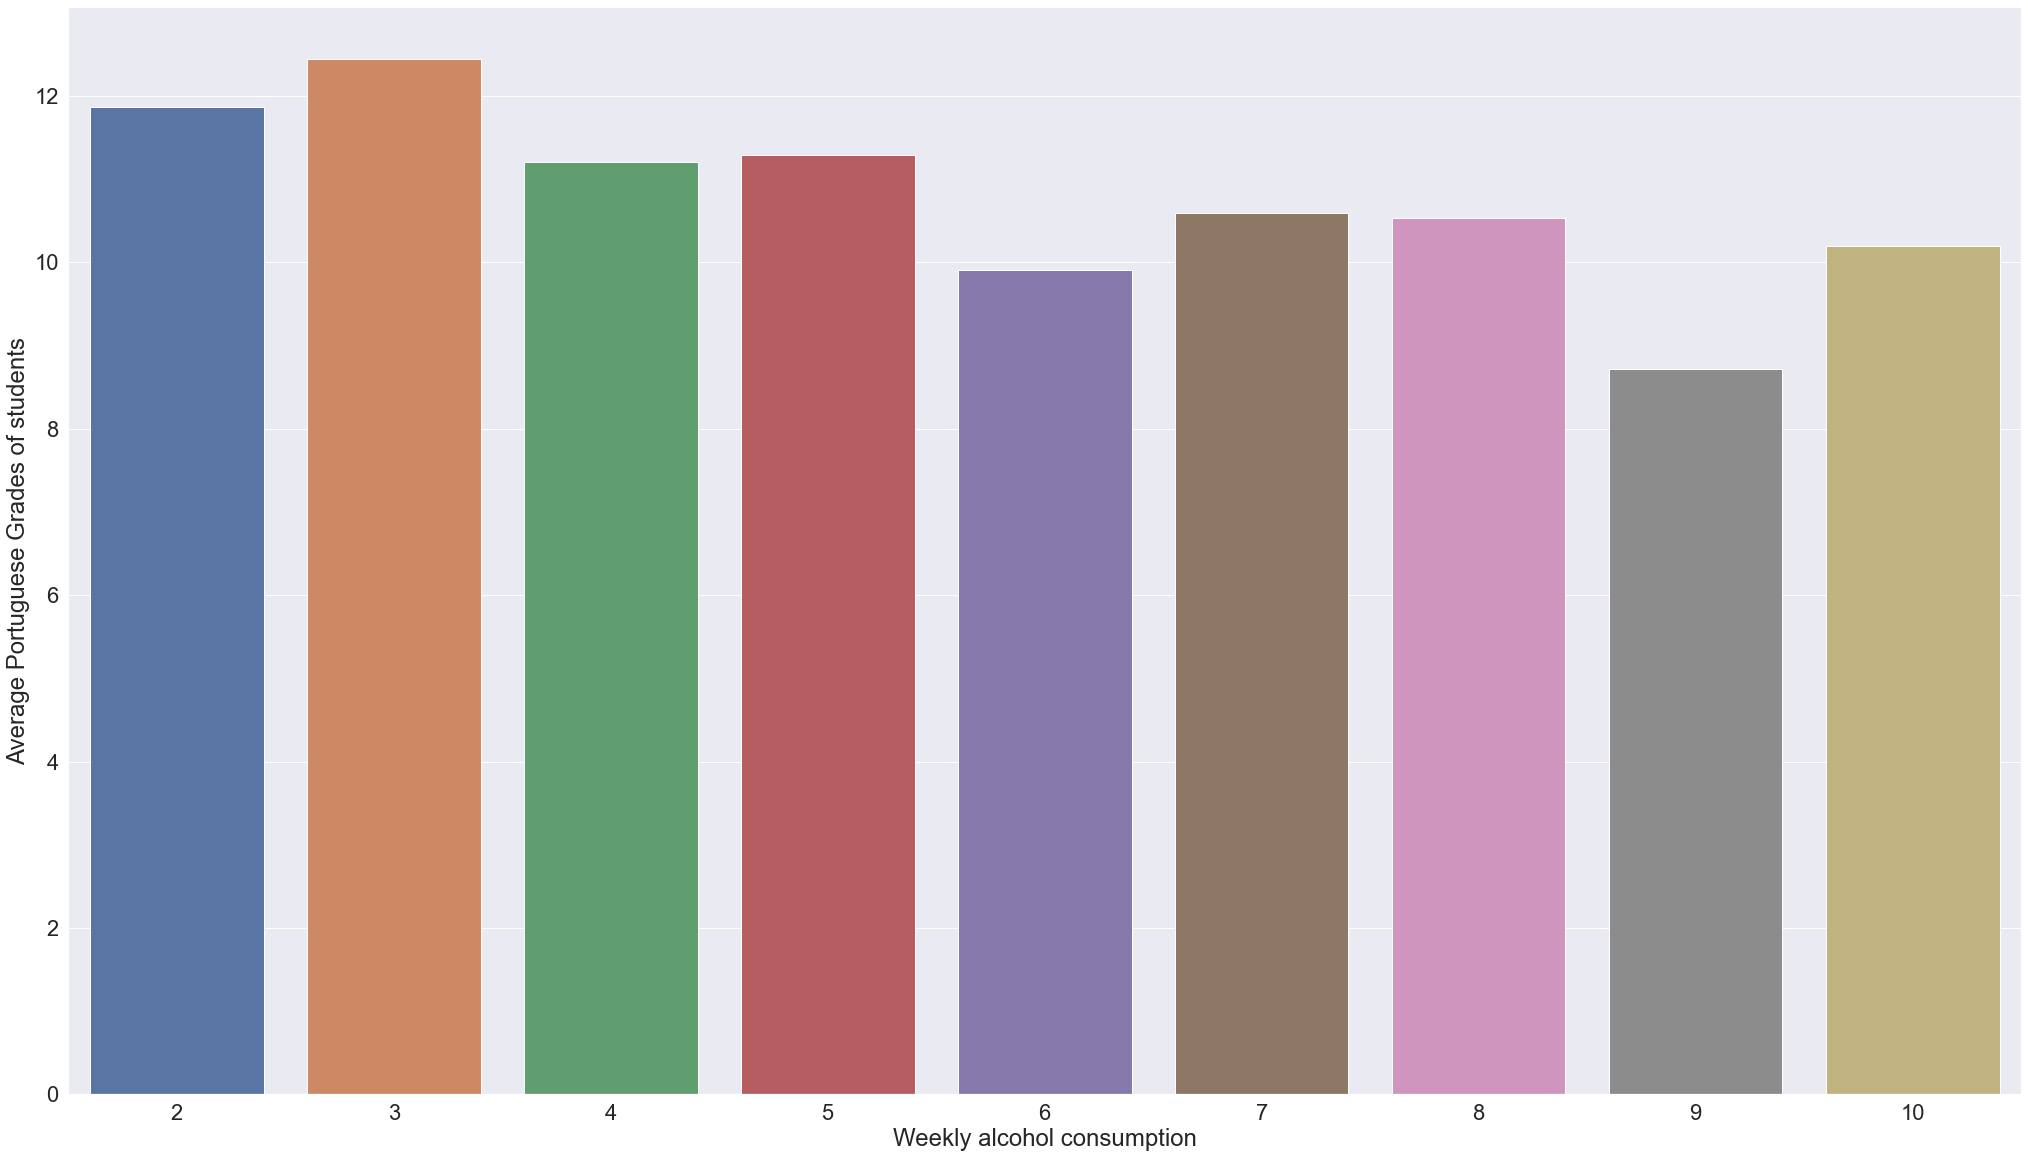

In [50]:
# Average Portuguese grade vs alc
lst = []
for i in range(2,11):
    lst.append(data[data.alc == i]['PG3'].sum()/float(len(data[data.alc == i])))
ax = sb.barplot(x = [2,3,4,5,6,7,8,9,10], y = lst)
plt.ylabel('Average Portuguese Grades of students')
plt.xlabel('Weekly alcohol consumption')

First, we plot violin plot to visualise the distribution of alcohol consumption vs grades.

[Text(0.5, 1.0, 'Math Grades vs Daily Alcohol Consumption')]

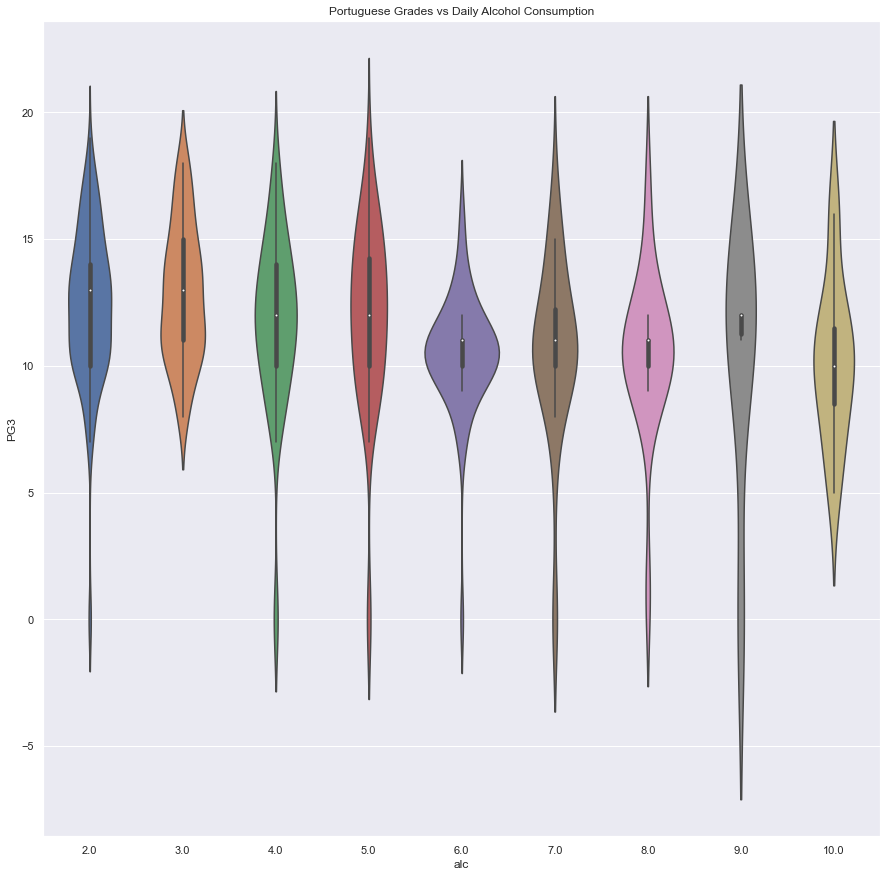

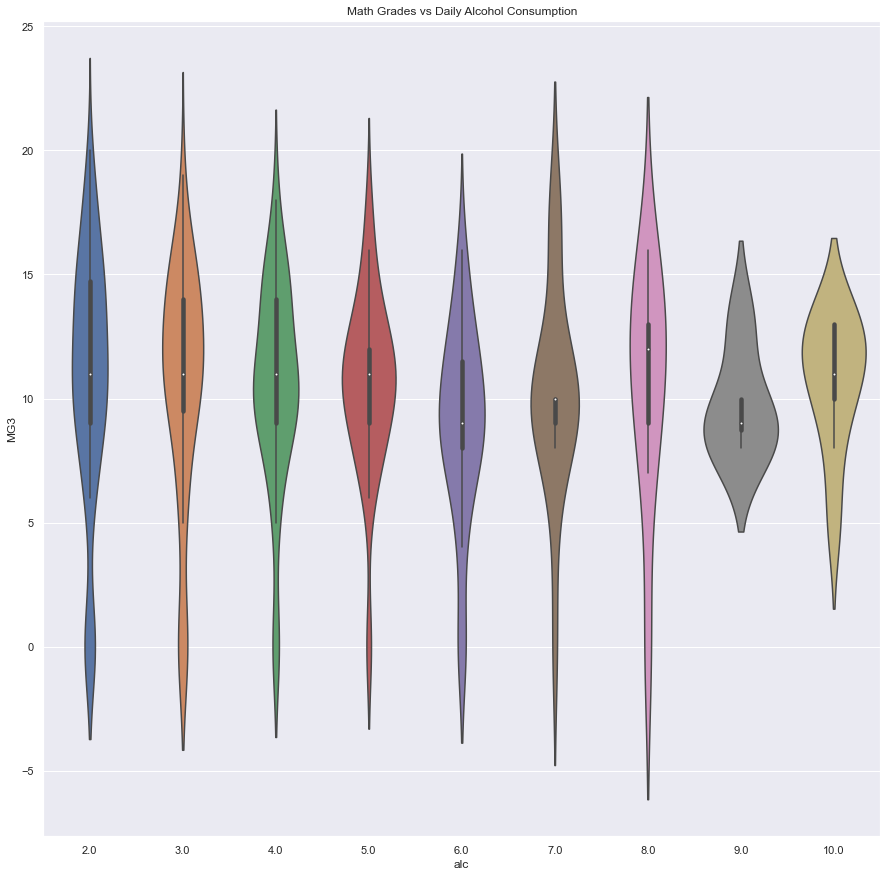

In [37]:
plt.figure(figsize=(15,15))
sb.violinplot(data=data, x="alc", y="PG3").set(title = "Portuguese Grades vs Daily Alcohol Consumption")
plt.figure(figsize=(15,15))
sb.violinplot(data=data, x="alc", y="MG3").set(title = "Math Grades vs Daily Alcohol Consumption")

The violin plot above shows the kernel density estimate, but it provides little information on the actual discrete distribution of the data, which is better illustrated with the swarm plots below.

Text(0.5, 0, 'alc')

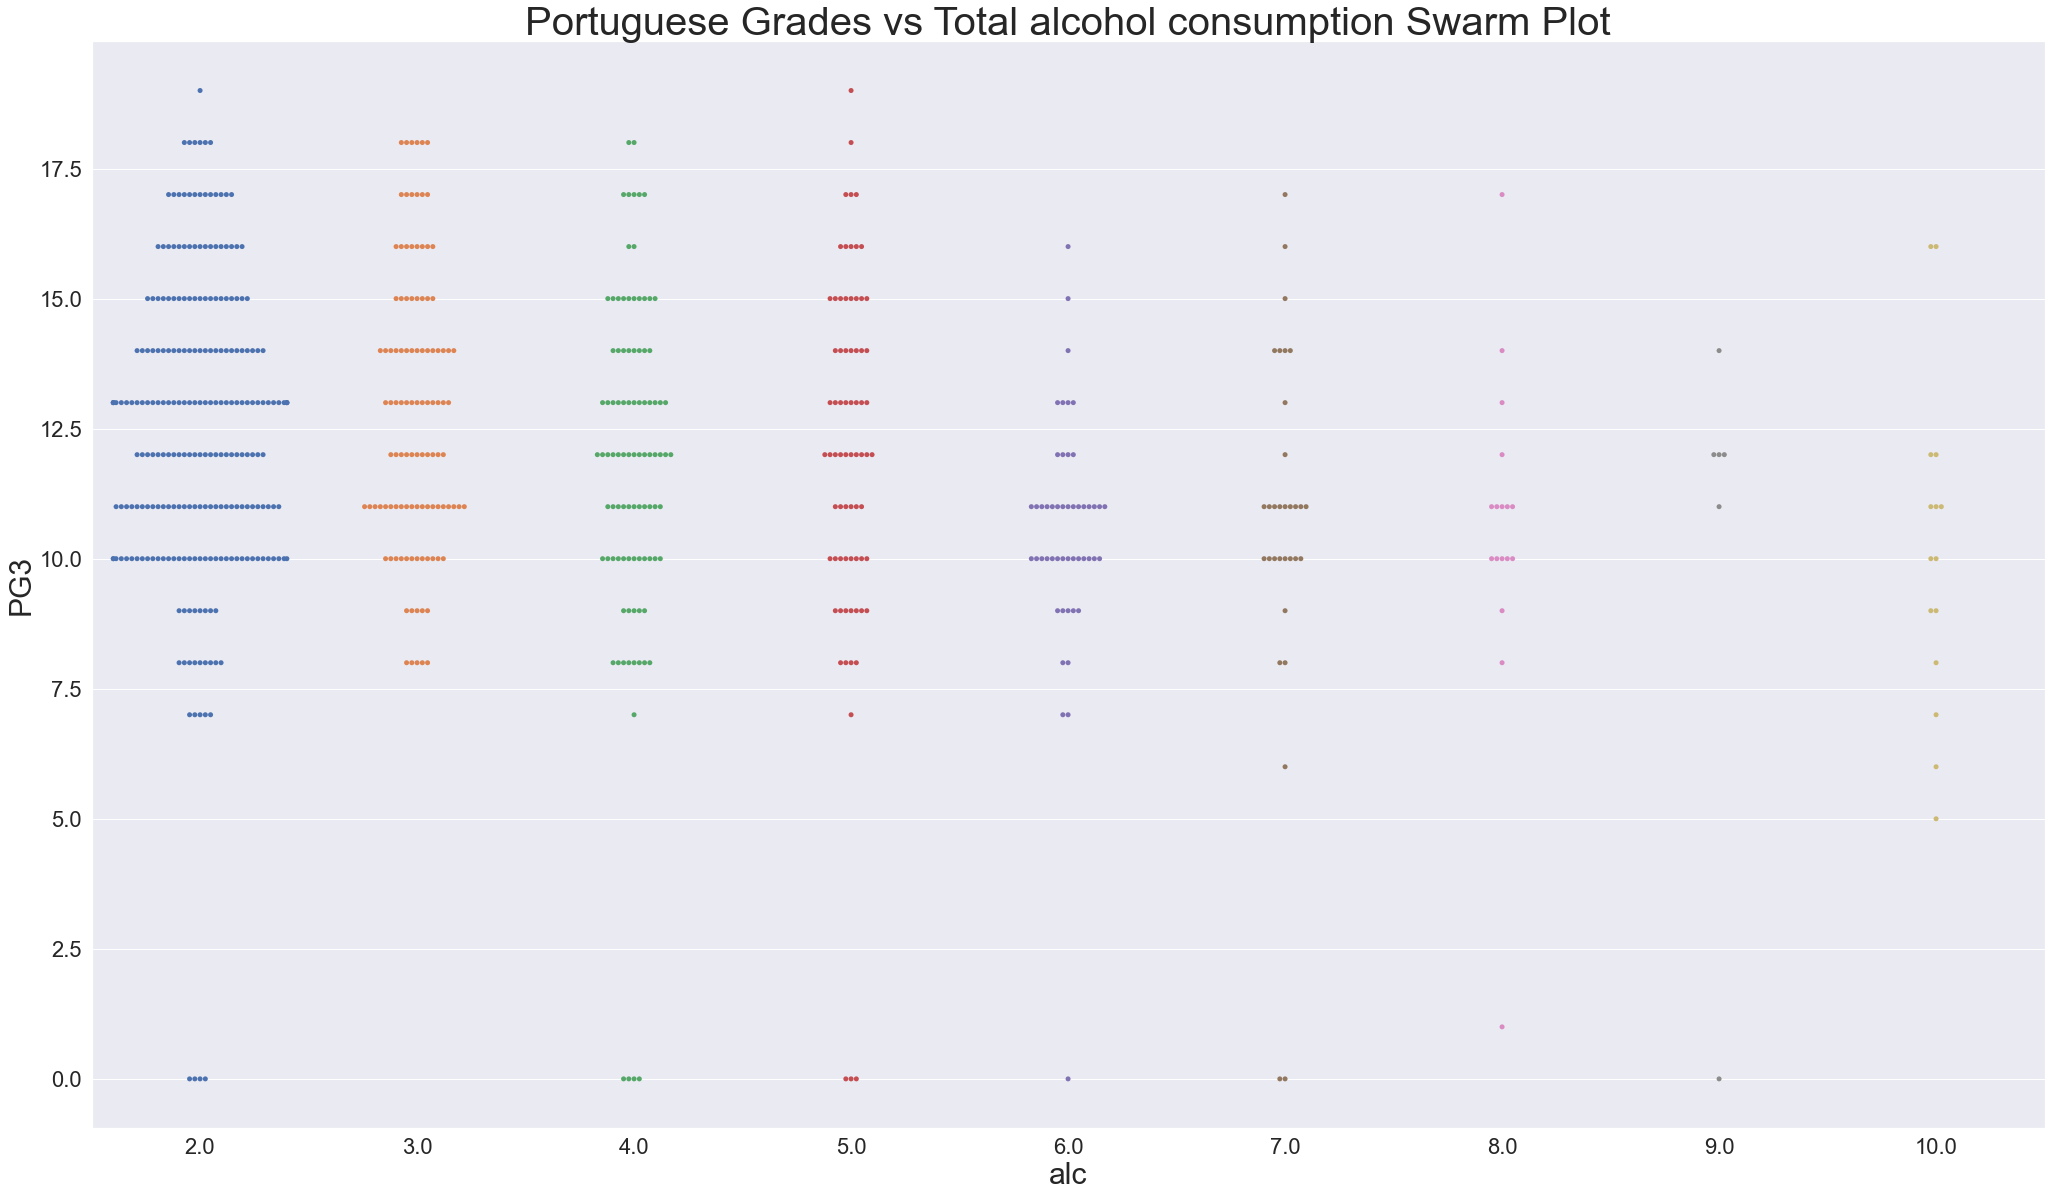

In [38]:
sb.set(rc = {'figure.figsize':(35,20)}, font_scale = 2)

sb.swarmplot(x='alc', y = 'PG3', data= data, size = 5)
plt.title ("Portuguese Grades vs Total alcohol consumption Swarm Plot", fontdict={'fontsize': 40})
plt.ylabel("PG3", fontsize = 30)
plt.xlabel("alc", fontsize = 30)

Text(0.5, 0, 'alc')

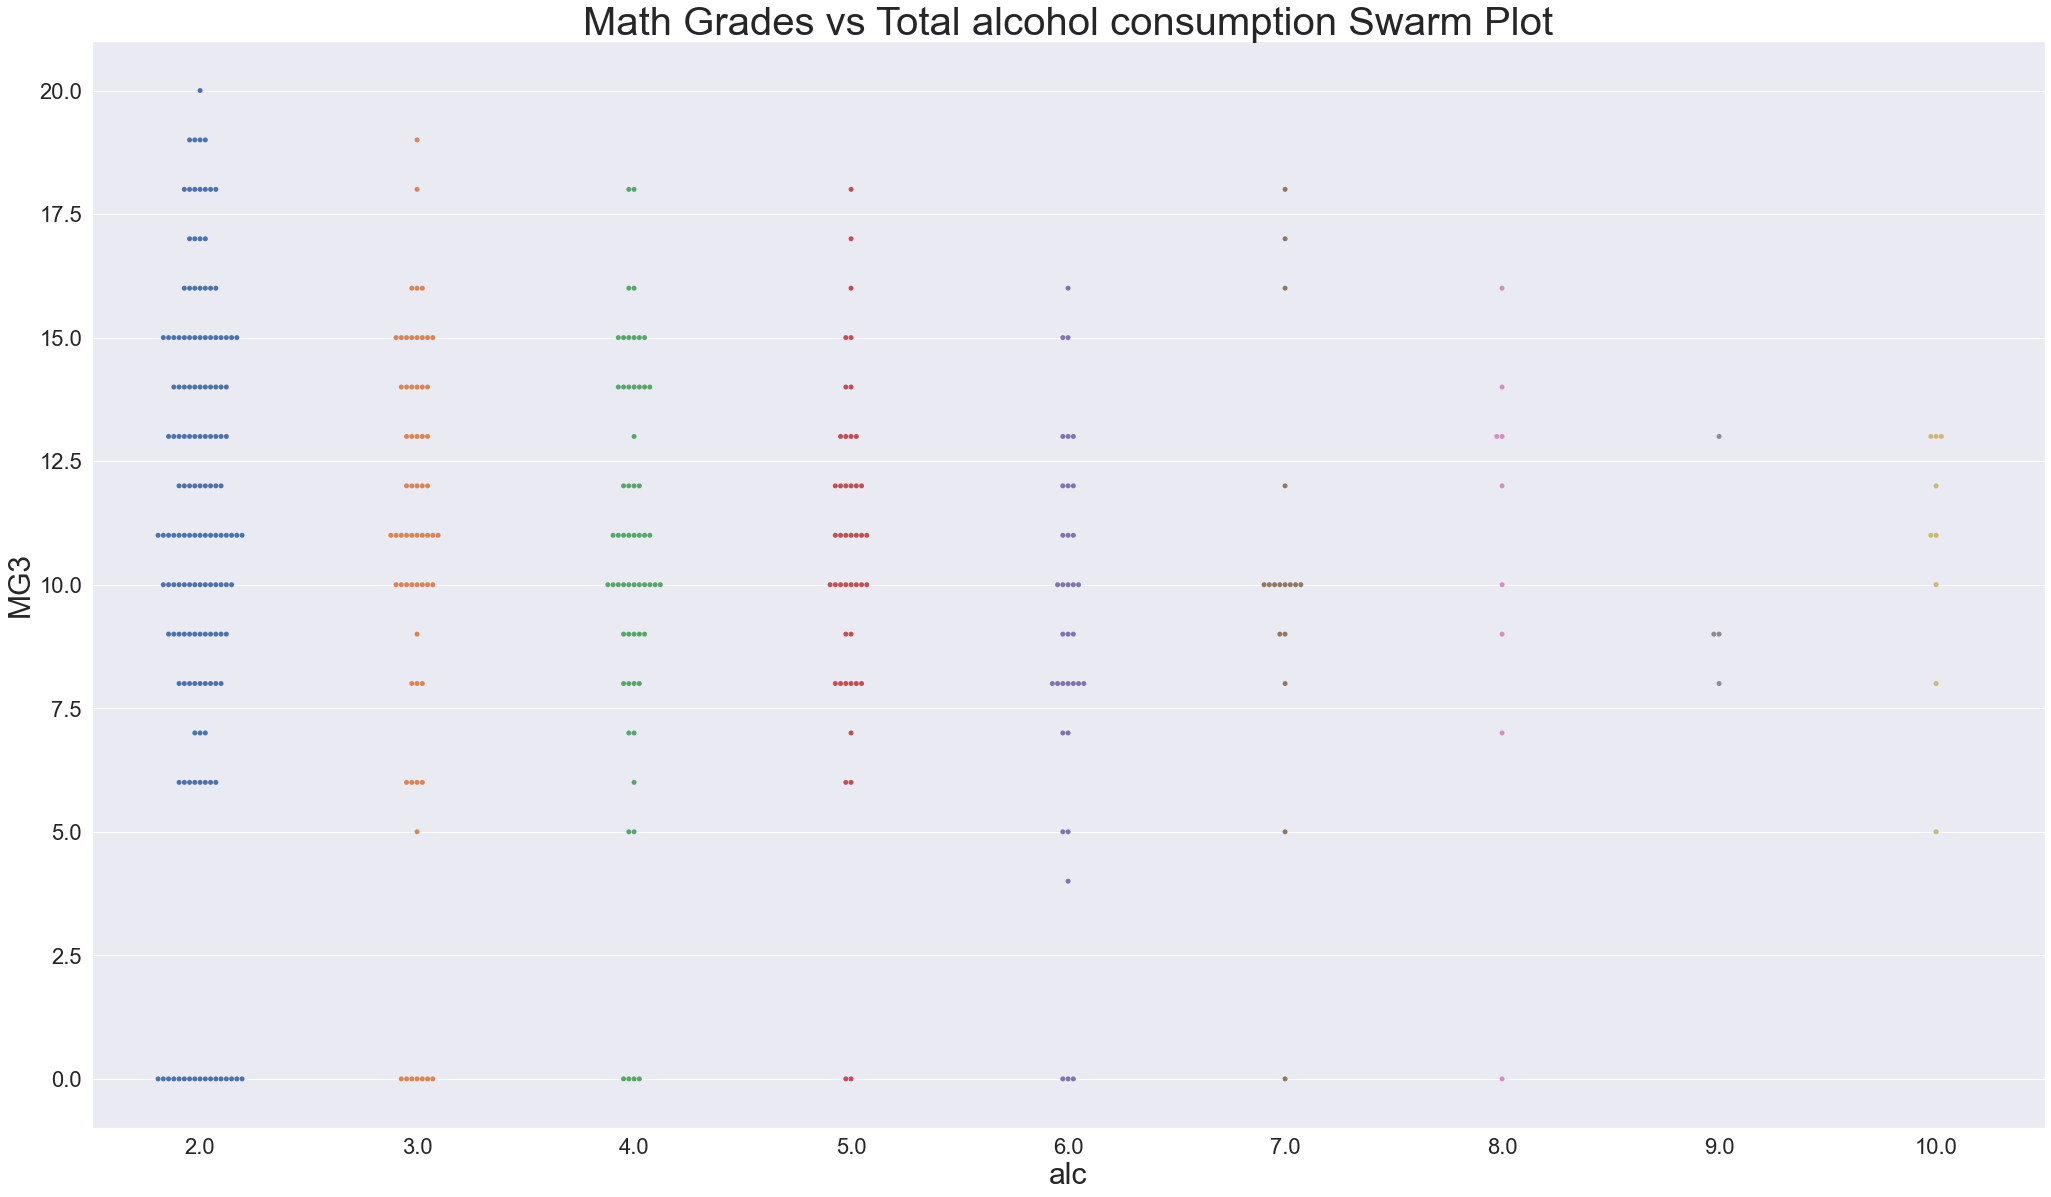

In [39]:
sb.set(rc = {'figure.figsize':(35,20)}, font_scale = 2)

sb.swarmplot(x='alc', y = 'MG3', data= data, size = 5)
plt.title ("Math Grades vs Total alcohol consumption Swarm Plot", fontdict={'fontsize': 40})
plt.ylabel("MG3", fontsize = 30)
plt.xlabel("alc", fontsize = 30)

Intuitively, we would expect that there is some form of correlation between alcohol consumption and grades, however our analysis so far in the correlation matrix, swarm plots, and violin plots, only shows that <b>there is no strong correlation between alcohol consumption and grades</b>.

---

### Explore Study time vs Grades among Students

First, we explore study time among students.

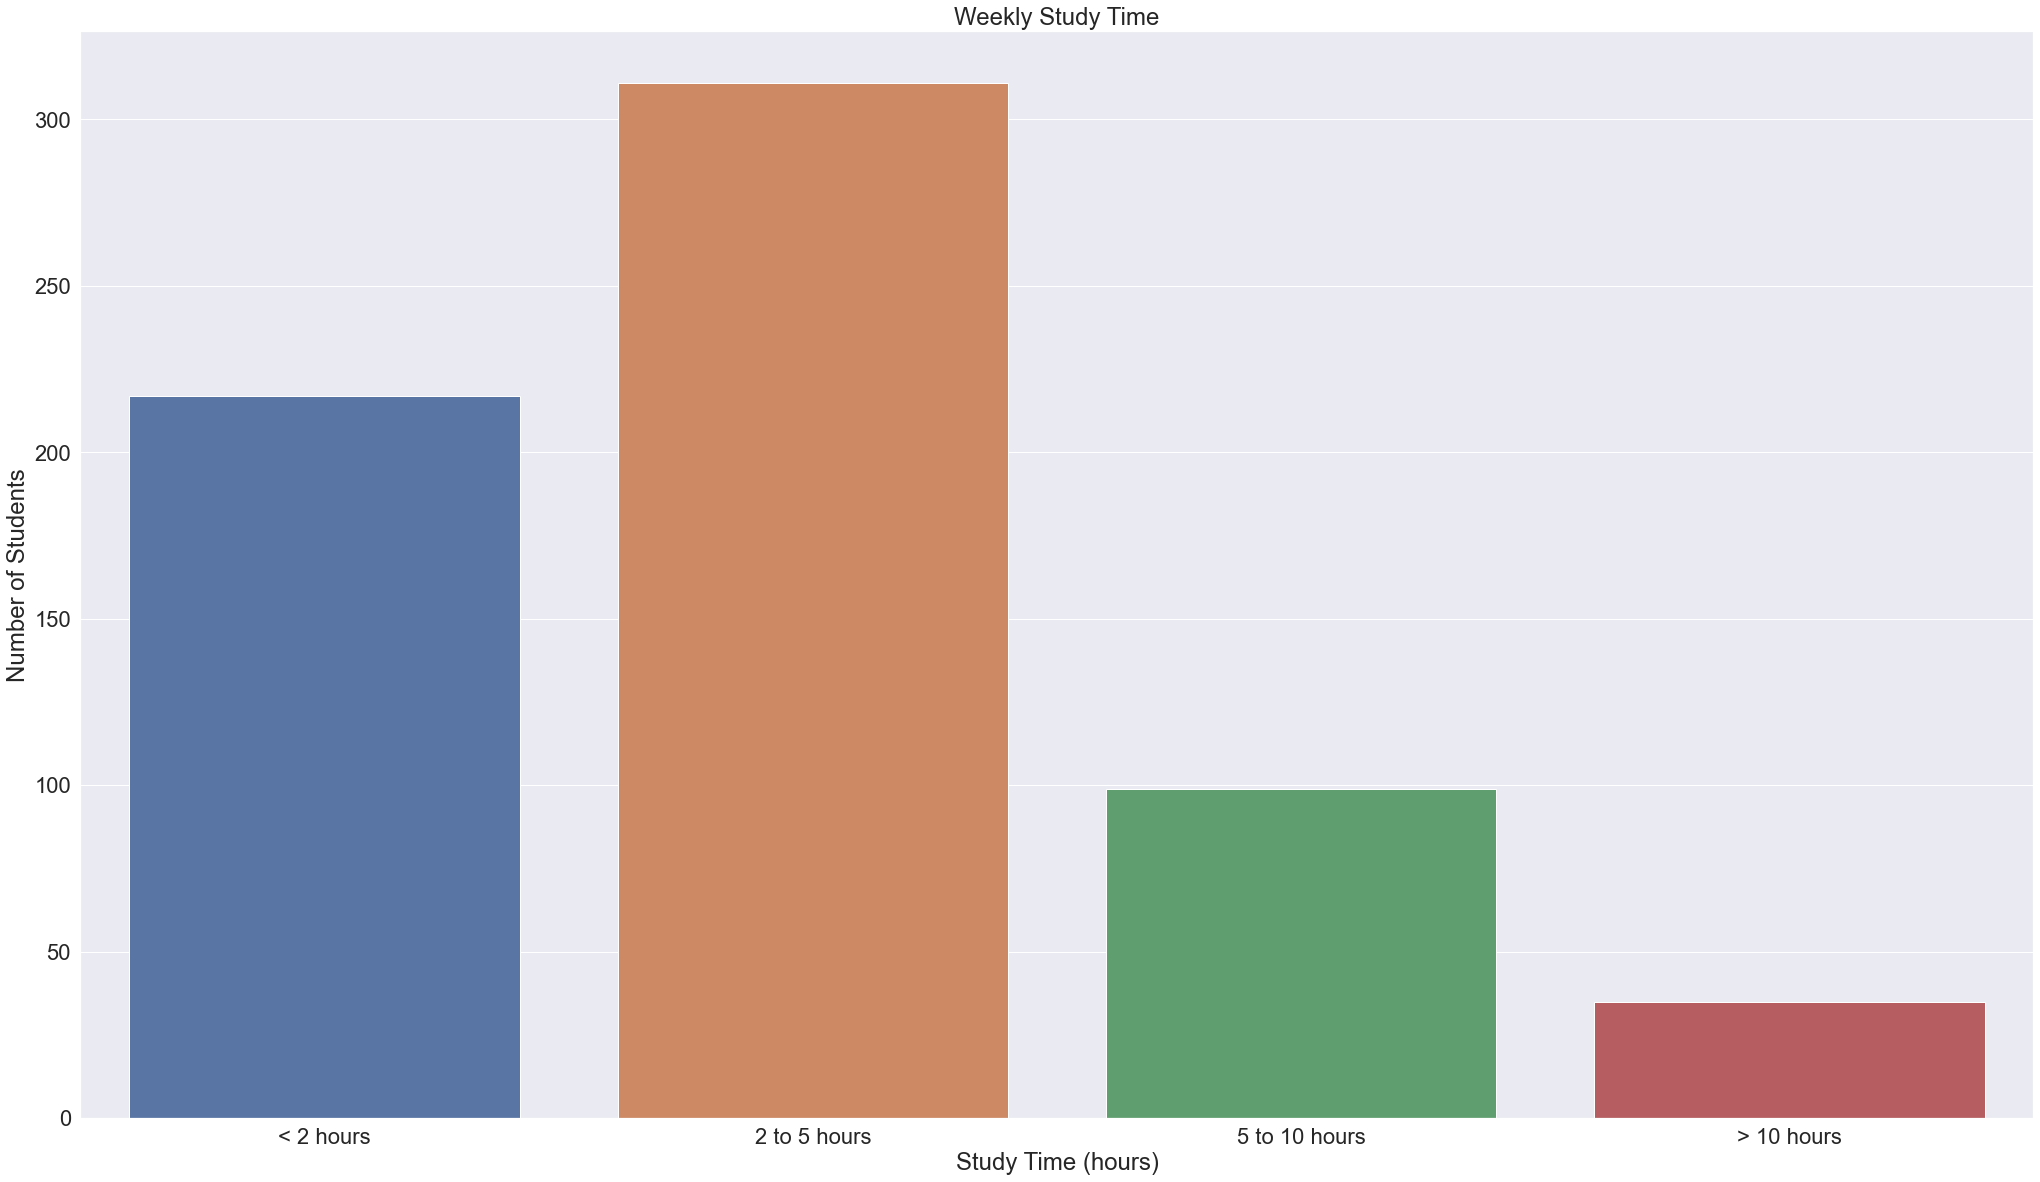

In [44]:
# count the number of students in each study time category
studytime_counts = data['studytime'].value_counts()

# sort data by category index
studytime_counts = studytime_counts.sort_index()

# set up the bar chart
ax = sb.barplot(x=['< 2 hours', '2 to 5 hours', '5 to 10 hours', '> 10 hours'], y=studytime_counts.values)

# set chart title and axis labels
plt.title('Weekly Study Time')
plt.xlabel('Study Time (hours)')
plt.ylabel('Number of Students')

# display the chart
plt.show()

We see that most students study between 2-5 hours. Many students also study less than 2 hours.
Overall, the majority of students study less than 5 hours.

Next, we look at boxplot and violinplot to understand the relationship between grades and study time.

[Text(0.5, 1.0, 'Math Grades vs Study time - Violinplot')]

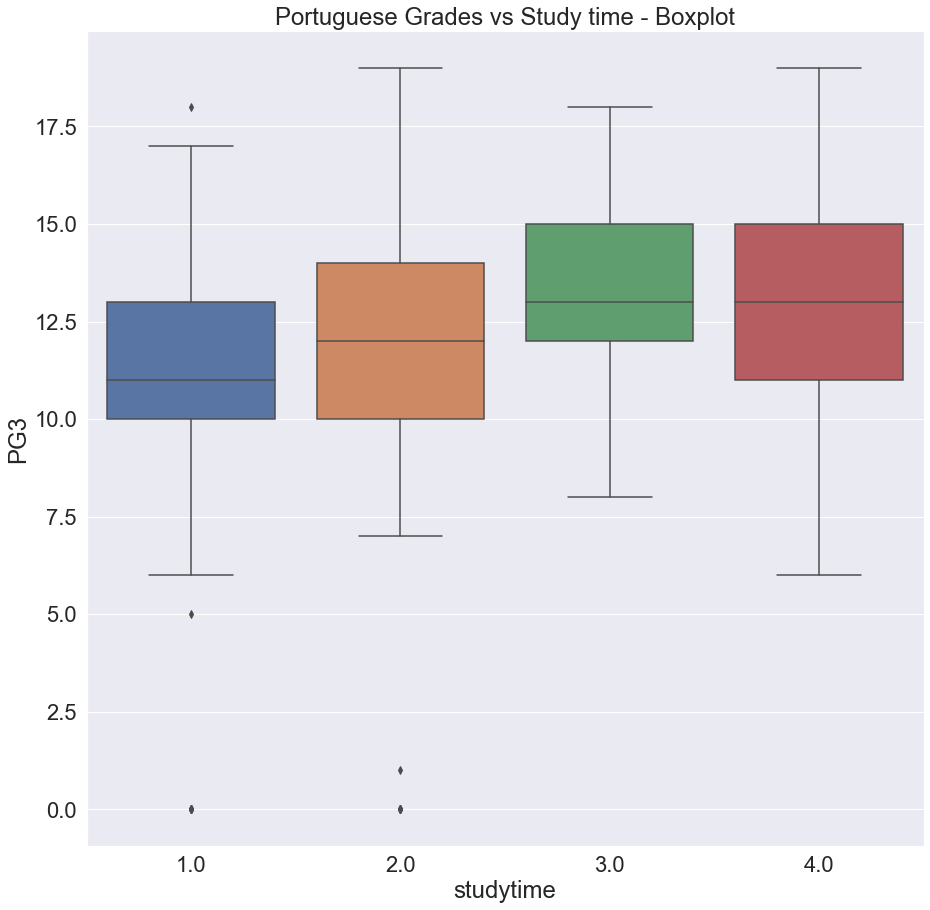

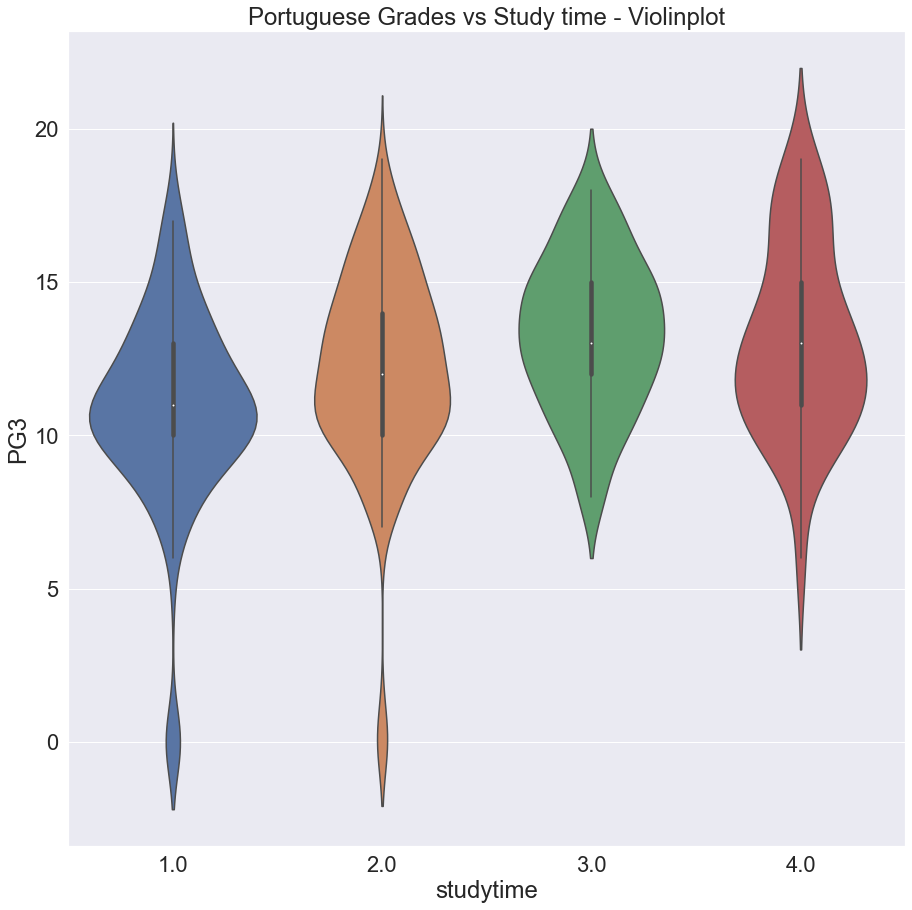

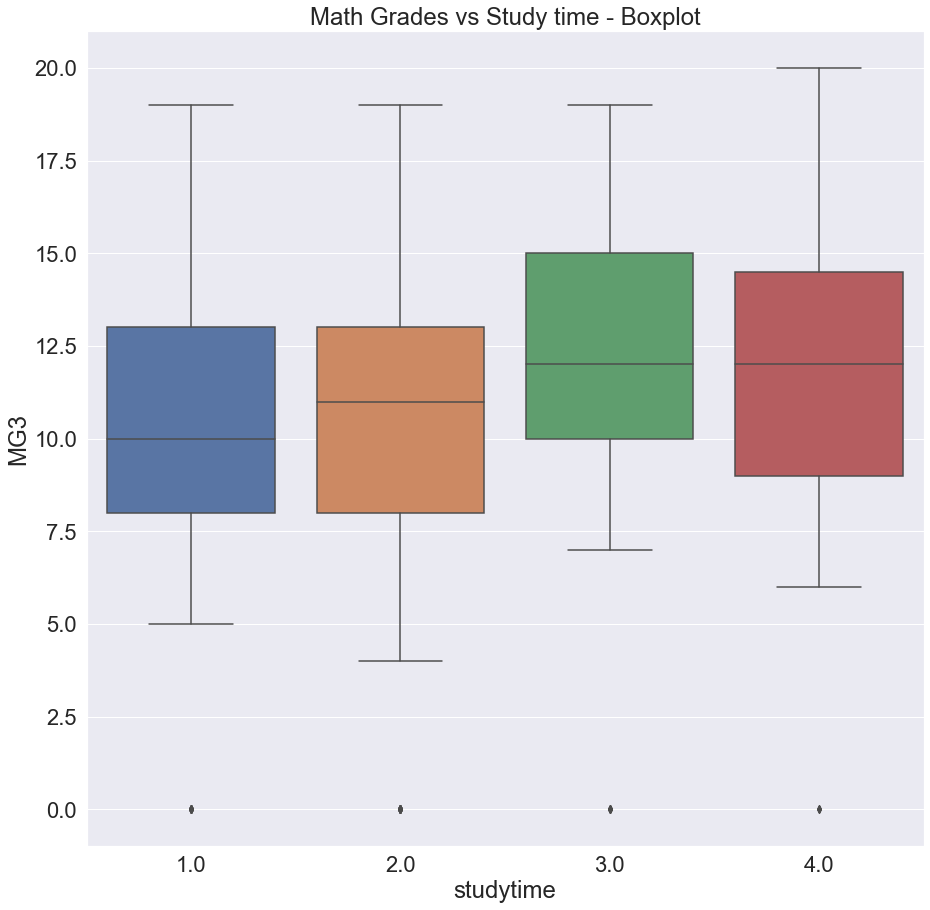

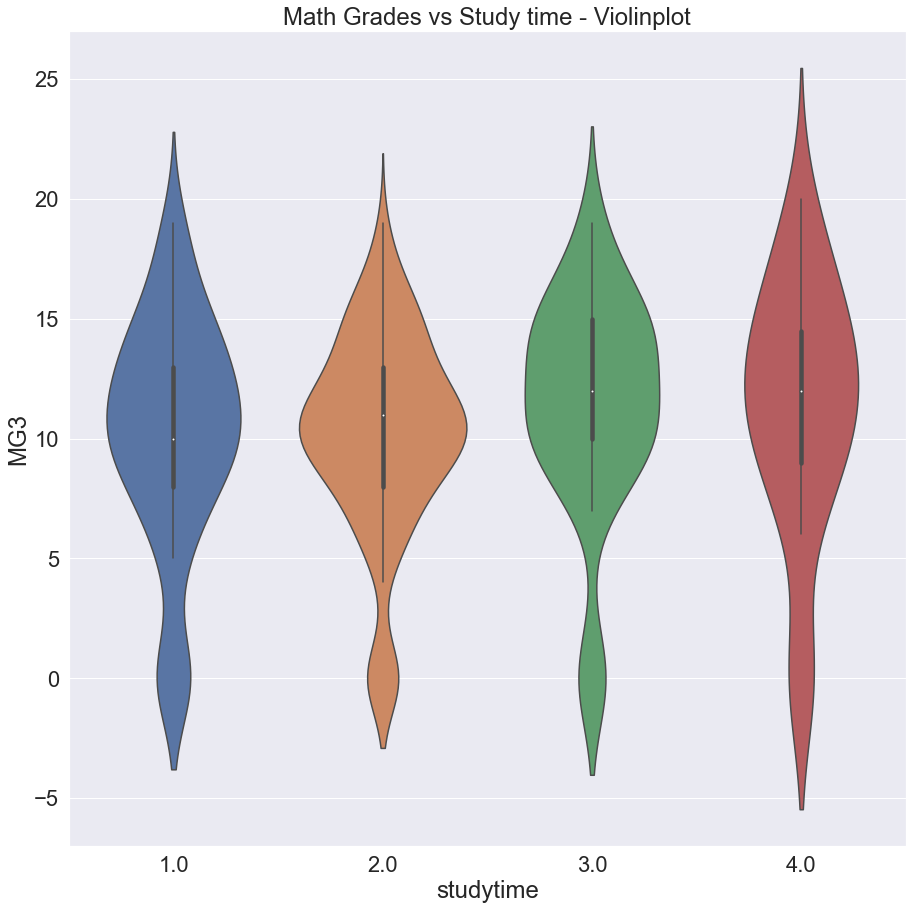

In [48]:
plt.figure(figsize=(15,15))
sb.boxplot(data=data, x="studytime", y="PG3").set(title = "Portuguese Grades vs Study time - Boxplot")

plt.figure(figsize=(15,15))
sb.violinplot(data=data, x="studytime", y="PG3").set(title = "Portuguese Grades vs Study time - Violinplot")

plt.figure(figsize=(15,15))
sb.boxplot(data=data, x="studytime", y="MG3").set(title = "Math Grades vs Study time - Boxplot")

plt.figure(figsize=(15,15))
sb.violinplot(data=data, x="studytime", y="MG3").set(title = "Math Grades vs Study time - Violinplot")

Generally, there is an increase in median Math and Portuguese grades for students who study more, which is to be expected. However, based on the correlation matrix, this correlation is weak. The median gap between students who study <2 hours and students who study >10 hours is around 2.5 marks, which is around 12.5% of their grades.